# Cover Page 
### Student ID: 210003508
### Module Code: GG4257 
### Module Title: Urban Analytics: A Toolkit for Sustainable Urban Development
### Assignment: Lab Assignment No 2 - Networks, Geodemographics and Spatial Microsimulation.
### Degree Programme: Geography 
### Deadline Date: 02.04.2025

In submitting this assignment, I hereby confirm that:

I have read the University's statement on Good Academic Practice; that the following work is my own work; and that significant academic debts and borrowings have been properly acknowledged and referenced.

# Introduction 

This section outlines how to replicate the code and access the required data. All data will be available in a **OneDrive folder**, with the code provided in a dedicated GitHub repository.

This report documents the work conducted for **Lab Assignment 2**, covering challenges from **Labs 5, 6 and 7**. Each lab section includes problem descriptions, methods, and results. Code is supplemented with comments and markdown explanations, with screenshots of outputs (e.g., maps and graphs) included to ensure clarity and help replication. To meet GitHub size limits, certain output cells have been cleared from the notebook. All data paths in the code assume files are stored in a folder named "Data". 

#### GitHub Username: Ejarrett
#### GitHub Repository: [UA_Lab_Assignment_2](https://github.com/ejarrettt/UA_Lab_Assignment_2)
#### [OneDrive Folder](https://1drv.ms/f/c/46775ff05561cd60/EtpKCVLnUXtMupoCXG5G86QB-GfpojgYMR0f4hgJI-Fclg?e=bvGWOb)

To replicate this report:
1. Clone the GitHub repository.
2. Download the datasets from the [OneDrive Folder](https://1drv.ms/f/c/46775ff05561cd60/EtpKCVLnUXtMupoCXG5G86QB-GfpojgYMR0f4hgJI-Fclg?e=bvGWOb)
3. Unzip the folder and copy the "Data" folder to the same place you have stored the notebook. 
4. Run this notebook. 

# Lab No 5: Introduction to Networks (2 Challenges)

In [ ]:
# Install dependencies 
! pip install -r requirements.txt

In [1]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

## Challenge 1:

It's time for you to apply everything you learned by analyzing a case study of FourSquare social Network. (Foursquare is a location-based online social network. The dataset contains a list of all of the user-to-user links)

Datasource: @inproceedings{gao2012exploring,
     title={Exploring social-historical ties on location-based social networks},
     author={Gao, Huiji and Tang, Jiliang and Liu, Huan},
     booktitle={Proceedings of the 6th International AAAI Conference on Weblogs and Social Media},
     year={2012}
}

- **Data**: `FS.csv` (avaliable in Moodle)

1. Read the FS network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network.
3. The dataset generates a graph of 639.014 nodes, so it is massive and you won't see anything meaningful if you try to plot it. So you need to create a subset using the **degree centrality** to find out find the top 4 of the most important nodes, and use them to create a subset of the original network. 
4. Extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the original network.
5. Create a plot for the subset created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Q1. Read the FS network dataset.

In [3]:
# Load Data
fs_network = pd.read_csv("/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data5/FS.csv")

# Print column names
print(fs_network.columns)


Index(['source', 'target'], dtype='object')


In [4]:
# Create Graph using correct column names
G = nx.from_pandas_edgelist(fs_network, source='source', target='target')

### Q2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network.

In [5]:
print(len(G))# Tells you the size of the graph `T`, 
print(type(G.nodes())) # Tells you the type of `T.nodes()`
print(list(G.edges(data=True))[-1]) # Read the attributes associated with the last element of the edges list. 
print(list(G.nodes(data=True))[0]) # Read the attributes associated with the first element of the node list.
print(type(list(G.edges(data=True))[-1][2])) # Which type; therefore, you can see what you are reading.

639014
<class 'networkx.classes.reportviews.NodeView'>
(94306, 128953, {})
(34802, {})
<class 'dict'>


In [6]:
# Using len to read the size of the graph
print(f"The size of the graph is: {len(G)}")
# Using len to read the number of edges and nodes
print(f"The number of edges in the graph is: {len(G.edges())}")
print(f"The number of nodes in the graph is: {len(G.nodes())}")

The size of the graph is: 639014
The number of edges in the graph is: 3214986
The number of nodes in the graph is: 639014


### Q3. The dataset generates a graph of 639.014 nodes, so it is massive and you won't see anything meaningful if you try to plot it. So you need to create a subset using the **degree centrality** to find out find the top 4 of the most important nodes, and use them to create a subset of the original network.

In [7]:
# Step 3: Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Get the top 4 nodes with highest degree centrality
top_4_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:4]
print("Top 4 nodes with highest degree centrality:", top_4_nodes)

# Create a subgraph with these nodes and their connections
subgraph_nodes = set(top_4_nodes)
for node in top_4_nodes:
    subgraph_nodes.update(G.neighbors(node))
G_sub = G.subgraph(subgraph_nodes)

Top 4 nodes with highest degree centrality: [106223, 89302, 76517, 66999]


### Q4. Extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the original network.

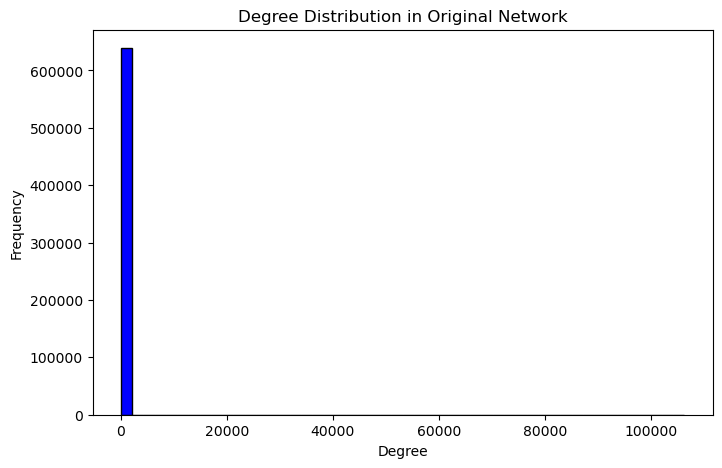

In [8]:
# Step 4: Degree Distribution Plot
degree_values = list(dict(G.degree()).values())
plt.figure(figsize=(8, 5))
plt.hist(degree_values, bins=50, color='blue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution in Original Network")
plt.show()

### Q5. Create a plot for the subset created.

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(G_sub, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray')
plt.title("Subgraph of Top 4 Nodes")
plt.show()

### Q6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`

In [ ]:
# Step 6: Compute and Plot Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_sub)
plt.figure(figsize=(8, 5))
plt.hist(betweenness_centrality.values(), bins=20, color='red', edgecolor='black')
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Distribution in Subgraph")
plt.show()

### Q7. Plot the Matrix, Arc and Circos from the subset.

In [ ]:
# Adjacency Matrix Plot
plt.figure(figsize=(8, 8))
sns.heatmap(nx.to_numpy_array(G_sub), cmap='coolwarm', square=True)
plt.title("Adjacency Matrix of Subgraph")
plt.show()

In [ ]:
# Arc Diagram
plt.figure(figsize=(10, 5))
nx.draw(G_sub, with_labels=False, node_size=50, edge_color='black', alpha=0.5, pos=nx.circular_layout(G_sub))
plt.title("Arc Diagram of Subgraph")
plt.show()

In [ ]:
# Circos Plot
plt.figure(figsize=(10, 10))
nx.draw_circular(G_sub, with_labels=True, node_size=200, edge_color='gray')
plt.title("Circos Plot of Subgraph")
plt.show()

## Challenge 2: 

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

### Q1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Define Birmingham city centre (Birmingham New Street Station)
birmingham_centre = (52.4778, -1.8984)
two_miles = 3218.68  # meters

# Retrieve the street network for driving routes within one mile
G_birmingham = ox.graph_from_point(birmingham_centre, dist=two_miles, network_type="drive")

# Plot the graph
fig, ax = ox.plot_graph(G_birmingham, node_size=0, figsize=(10, 10))
plt.show()


In [ ]:
# Conversion to a gdf
warnings.simplefilter('ignore', DeprecationWarning)

# Using graph to gdfs
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_birmingham)
# Now there is a geodataframe (G_dub) that has the edges and the nodes. 

### Q2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.

In [ ]:
# Finding the area in meters of the map 
warnings.filterwarnings('ignore')
G_birmingham_proj = ox.project_graph(G_birmingham)
nodes_proj = ox.graph_to_gdfs(G_birmingham_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

In [ ]:
# Basic statistics of the map 
ox.basic_stats(G_birmingham_proj, area=graph_area_m, clean_int_tol=15)

In [ ]:
# Here, I can use .edges/.nodes and len() to print the number of nodes and edges; this is already included above with n and m, but this will make it extra clear. 
print(len(list(G_birmingham.edges)))
print(len(list(G_birmingham.nodes)))

### Q3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot

In [ ]:
# Customizing the plot using matplotlib
fig, ax = ox.plot_graph(G_birmingham,
                         figsize=(10, 10),  # Adjusting figure size 
                         node_size=2,  # Increased the node size to 2 
                         edge_color="red",  # Made all the edges red for contrast
                         edge_linewidth=0.5,  # Made all the edges 0.5 thickness 
                         show=False)  # I'd like to add a title later. 

plt.title("Street Network around Birmingham New Street Station Within Two Miles")  # Adding a title

plt.show()  # Displaying the plot

### Q4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.

In [ ]:
# Using add_edge_speeds and travel times
G_birmingham = ox.speed.add_edge_speeds(G_birmingham)
G_birmingham = ox.speed.add_edge_travel_times(G_birmingham)

In [ ]:
# Getting the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G_birmingham, X=-1.8984, Y=52.4778)  # Birmingham New Street Station
dest = ox.distance.nearest_nodes(G_birmingham, X=-1.8881, Y=52.4862)  # Aston University

print(f"Origin Node: {orig}, Destination Node: {dest}")

In [ ]:
# finding the shortest path between nodes, minimizing travel time, then plotting it
route = ox.shortest_path(G_birmingham, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G_birmingham, route, node_size=0)

### Q5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G_birmingham))
nx.set_edge_attributes(G_birmingham, edge_centrality, "edge_centrality")

In [ ]:
# coloring the edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_birmingham, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_birmingham, edge_color=ec, edge_linewidth=2, node_size=0)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# These lines here calculate the betweenness centrality for all the nodes in "G_dub" and stores them in a dictionary (called betweenness list)
betweenness_centrality = nx.betweenness_centrality(G_birmingham)

# Extracting betweenness_centrality values as a list
betweenness_list = list(betweenness_centrality.values())

# Print the betweenness centrality list
#print(betweenness_list) # This outcome is quite long, as a note, so feel free to remove the hashtag if you wish. 

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
betweenness_centrality = nx.betweenness_centrality(nx.line_graph(G_birmingham))
nx.set_edge_attributes(G_birmingham, betweenness_centrality, "betweenness_centrality")
# coloring the edges in original graph with betweenness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_birmingham, "betweenness_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_birmingham, edge_color=ec, edge_linewidth=2, node_size=0)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# This line her|e calculates the degree centrality for all the nodes in "G_dub" and stores them in a dictionary (called degree-centrality)
degree_centrality = nx.degree_centrality(G_birmingham)

# Extracting degree centrality values as a list
centrality_list = list(degree_centrality.values())

# Print the degree centrality list
print(centrality_list) # This outcome is quite long, as a note. 

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
degree_centrality = nx.degree_centrality(nx.line_graph(G_birmingham))
nx.set_edge_attributes(G_birmingham, degree_centrality, "degree_centrality")
# coloring the edges in original graph with degree centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_birmingham, "degree_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_birmingham, edge_color=ec, edge_linewidth=2, node_size=0)

### Q6. Create the figure-groud from the selected city

In [ ]:
from IPython.display import Image
# configure the inline image display
img_folder = "images"
extension = "png"
size = 300
dpi = 40

In [ ]:
import osmnx as ox
from IPython.display import Image

# Define Birmingham as the new place
place = "birmingham"
point = (52.4778, -1.8984)  # Birmingham New Street Station

# Define street widths based on road types
street_widths = {
    "footway": 0.5,
    "steps": 0.5,
    "pedestrian": 0.5,
    "path": 0.5,
    "track": 0.5,
    "service": 2,
    "residential": 3,
    "primary": 5,
    "motorway": 6,
}

# Define output image settings
img_folder = "images"  # Adjust if needed
extension = "png"
dpi = 300  # High resolution
size = 500  # Adjust the display size

# File path for saving the image
fp = f"./{img_folder}/{place}.{extension}"

# Generate and save the figure-ground diagram
fig, ax = ox.plot_figure_ground(
    point=point,
    filepath=fp,
    network_type="all",
    street_widths=street_widths,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)

# Display the image
Image(fp, height=size, width=size)

### Q7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

In [ ]:
# explore graph nodes interactively, with different basemap tiles
nodes = ox.graph_to_gdfs(G_birmingham, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 8})

In [ ]:
# explore graph edges interactively, with a simple one-liner
ox.graph_to_gdfs(G_birmingham, nodes=False).explore()

In [ ]:
# explore nodes and edges together in a single map
nodes, edges = ox.graph_to_gdfs(G_birmingham)
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="yellow", marker_kwds={"radius": 6})

In [ ]:
# explore graph nodes interactively, colored by betweenness centrality
nx.set_node_attributes(G_birmingham, nx.betweenness_centrality(G_birmingham, weight="length"), name="bc")
nodes = ox.graph_to_gdfs(G_birmingham, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

### Q8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.

In [ ]:
# Save graph to disk as geopackage (for GIS)
ox.save_graph_geopackage(G_birmingham, filepath="data/birminghamnetwork.gpkg")

In [ ]:
import geopandas as gpd

# Read the GeoPackage file into a GeoDataFrame
gdf_nodes, gdf_edges = gpd.read_file("data/birminghamnetwork.gpkg", layer="nodes"), gpd.read_file("data/birminghamnetwork.gpkg", layer="edges")

In [ ]:
# Mapping both the edges and the nodes into one map using .explore
m = gdf_edges.explore(color="red", tiles="cartodbdarkmatter")
gdf_nodes.explore(m=m, color="skyblue", marker_kwds={"radius": 6})

### Q9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Defining the point of interest (Birmingham New Street Station)
birmingham_city_centre = (52.4778, -1.8984)
two_miles = 3218.68  # meters

# Extracting the building footprints within a 2-mile radius of Birmingham New Street
building_footprints = ox.geometries_from_point(
    birmingham_city_centre,
    tags={"building": True},
    dist=two_miles,
)

# Plotting the road network graph
G_birmingham = ox.graph_from_point(birmingham_city_centre, dist=two_miles, network_type="drive")
fig, ax = ox.plot_graph(G_birmingham, node_size=0, show=False)

# Plotting the building footprints using .plot
building_footprints.plot(ax=ax, facecolor='yellow', alpha=1)  # Highlight buildings in yellow

# Show the plot
plt.show()

# Lab No 6: Geodemographics (1 Challenge)

## Challenge 1: Geodemographic Classification

In this challenge, you will replicate the process of creating a geodemographic classification using the k-means clustering algorithm. Please select any city in the UK except London, Liverpool, or Glasgow. The main goal is to generate a meaningful and informative classification that captures the diversity of areas in your dataset using the census data ( For England, you can try to use the 2021 or 2011 census, and for Scotland, you need to use the 2011 census data) 

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.
3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 
4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.
7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?
10. Map the final cluster groups
11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.
12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

### Q1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 

### Q2. Look for census data from the selected city for which you would like to generate the geodemographic classification.

### Q3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 

### Q4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.

### Q5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.

### Q6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.

### Q7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.

### Q8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.

### Q9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?

### Q10. Map the final cluster groups

### Q11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.

### Q12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

# Lab No 7: Spatial Microsimulation (3 Challenges)

## Challenge 1: 

## Challenge 2: 

## Challenge 3: 

# Final Remarks (limitations, barriers, and any additional comments)